# Analyse des prix des Airbnb de New-York City

Vous êtes Data Analyst chez Airbnb et êtes missionné(e) pour comprendre les données spécifiques à New-York afin de faire les meilleures recommandations. 

Le travail qui vous est demandé contient nécessaire deux parties, mais peut être poussé plus loin en fonction du temps que vous avez et des idées que vous proposez.

- Vous devez faire une "Exploratory Data Analysis" (EDA) complète du jeu de données. 
Plusieurs questions clefs sont mentionnées, n'hésitez pas à apporter vous même un regard neuf sur les données, à faire des analyses complémentaires, à les interpreter et commenter.
- Vous devez produire un modèle prédictif du prix d'un logement Airbnb, ce modèle servira à conseiller au mieux les clients (propriétaires d'appartement) sur le prix qu'ils peuvent proposer à leurs hôtes. 

Votre déliverable contient ce notebook d'analyses ainsi qu'une présentation type powerpoint que vous ferez telle que si vous aviez été en face du Chief Data Officer d'Airbnb (vous aurez 20 minutes + 10 minutes questions). Vous devrez m'envoyer une version presque finie du notebook la veille de votre soutenance à 12h. 

Naturellement, ce notebook doit être commenté et écrit de façon claire et lisible (en respectant au mieux les règles - voir sur en ligne - pour écrire proprement du code). 

## Données 

### Packages 

Structurez votre code en regroupant tous les packages utilisés ici. Cela permet notamment d'installer les packages manquant avec '!pip install' dès le début du notebook si besoin.

In [ ]:
#!pip install pandas
#!pip install pandas-profiling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

### Téléchargement 

Les données peuvent être téléchargées avec le lien suivant :
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/download

Elles doivent être décompressées, puis placées dans le répertoire contenant ce notebook.

Elles contiennent un fichier CSV "AB_NYC_2019.csv" ainsi qu'une carte de NYC "New_York_City_.png" vous permettant de représenter graphiquement certaines de vos analyses.

In [7]:
AB_NYC_2019 = pd.read_csv("AB_NYC_2019.csv")

In [3]:
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
AB_NYC_2019[(AB_NYC_2019.last_review.isnull())].shape

(10052, 16)

In [4]:
plt.rcParams["figure.figsize"] = (20,10)
nyc = mpimg.imread('New_York_City_.png', 0)
plt.imshow(nyc)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'New_York_City_.png'

### Transformations 

Vous pouvez transformer les données comme bon vous semble (Data Cleaning - Data Preparation).

In [9]:

# On remplace les NaN de reviews per month par la constant 0 car  a chaque fois qu'on a des NaN pour reviews
# per month
# on a 0 pour last reviews. Pour garder une cérance entre last_review et reviews per month on met les NaN a 0 0

import numpy as np
from sklearn.impute import SimpleImputer

SI = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value= 0
        )

data = SI.fit_transform([AB_NYC_2019['reviews_per_month']])

# affectation du resulat dans le dataframe
AB_NYC_2019['reviews_per_month'] = data[0]

In [10]:
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
columns = ['id','host_id','host_name','latitude','longitude','last_review',
           'calculated_host_listings_count','availability_365']
df = AB_NYC_2019.drop(columns,axis=1)

In [12]:
df.head()

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
0,Clean & quiet apt home by the park,Brooklyn,Kensington,Private room,149,1,9,0.21
1,Skylit Midtown Castle,Manhattan,Midtown,Entire home/apt,225,1,45,0.38
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,Private room,150,3,0,0.00
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10


## Exploratory Data Analysis

### Questions requises

Pour chacune de ces questions, il vous est demandé d'analyser finement et de conserver et commenter les analyses / graphiques qui vous semblent pertinents.

#### Description des variables

Analysez et commentez les distributions des valeurs prises par les variables catégorielles et quantitatives.

In [45]:
import seaborn as sns

Text(0, 0.5, 'normalized counts')

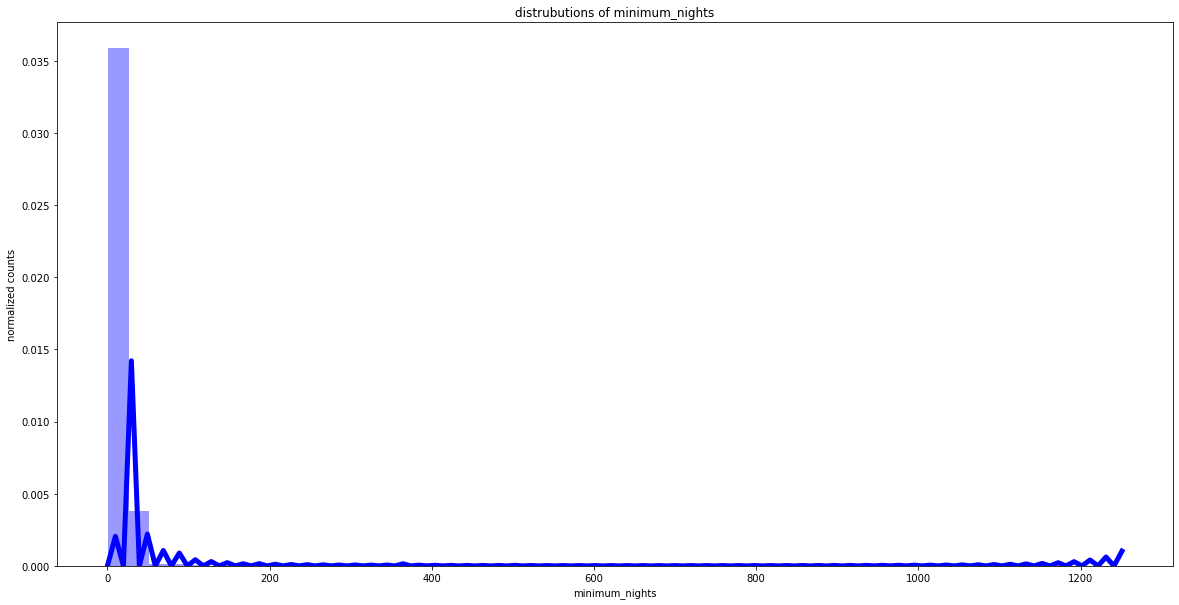

In [52]:
b = df['minimum_nights'].value_counts()
sns.distplot(df['minimum_nights'],
             color = 'blue',
             kde_kws={'linewidth': 5})
plt.title('distrubutions of minimum_nights')
plt.xlabel('minimum_nights')
plt.ylabel('normalized counts')

In [70]:
df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Rossville                1
Fort Wadsworth           1
New Dorp                 1
Willowbrook              1
Woodrow                  1
Name: neighbourhood, Length: 221, dtype: int64

Text(0, 0.5, 'normalized counts')

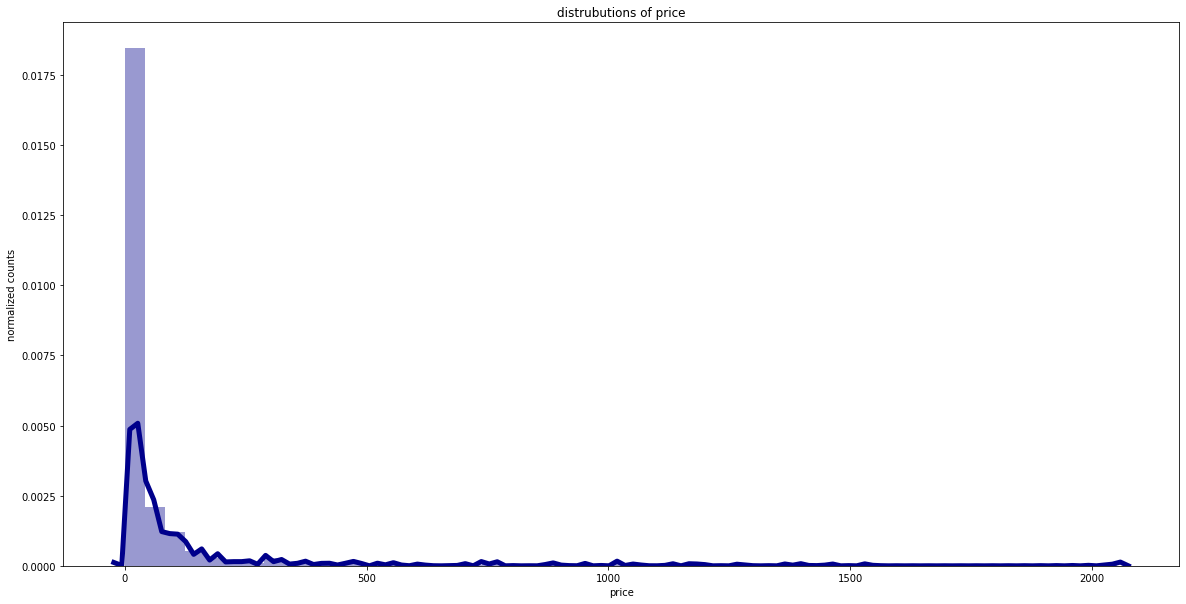

In [60]:
a = df['price'].value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of price')
plt.xlabel('price')
plt.ylabel('normalized counts')

Text(0, 0.5, 'normalized counts')

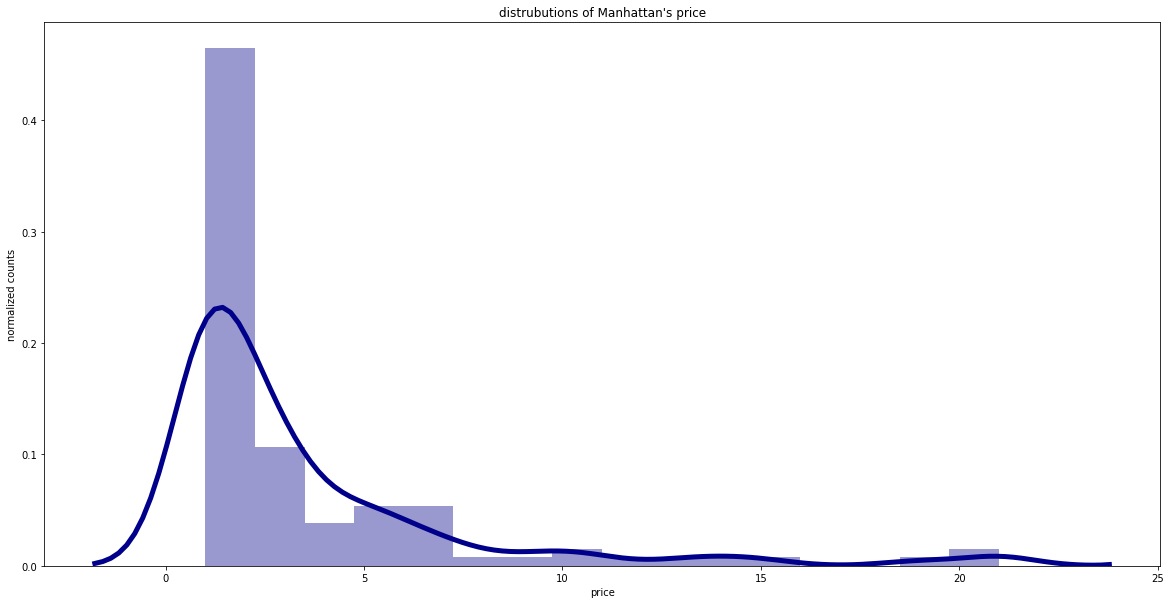

In [69]:
a = df[df.neighbourhood_group =='Staten Island'].price.value_counts()
sns.distplot(list(a),
             color = 'darkblue',
             #hist=False,
             kde_kws={'linewidth': 5})
plt.title('distrubutions of Manhattan\'s price')
plt.xlabel('price')
plt.ylabel('normalized counts')

#### Impact sur le prix 

Analysez et commentez le rôle joué par les différentes variables sur le prix de location.

Text(0, 0.5, 'normalized counts')

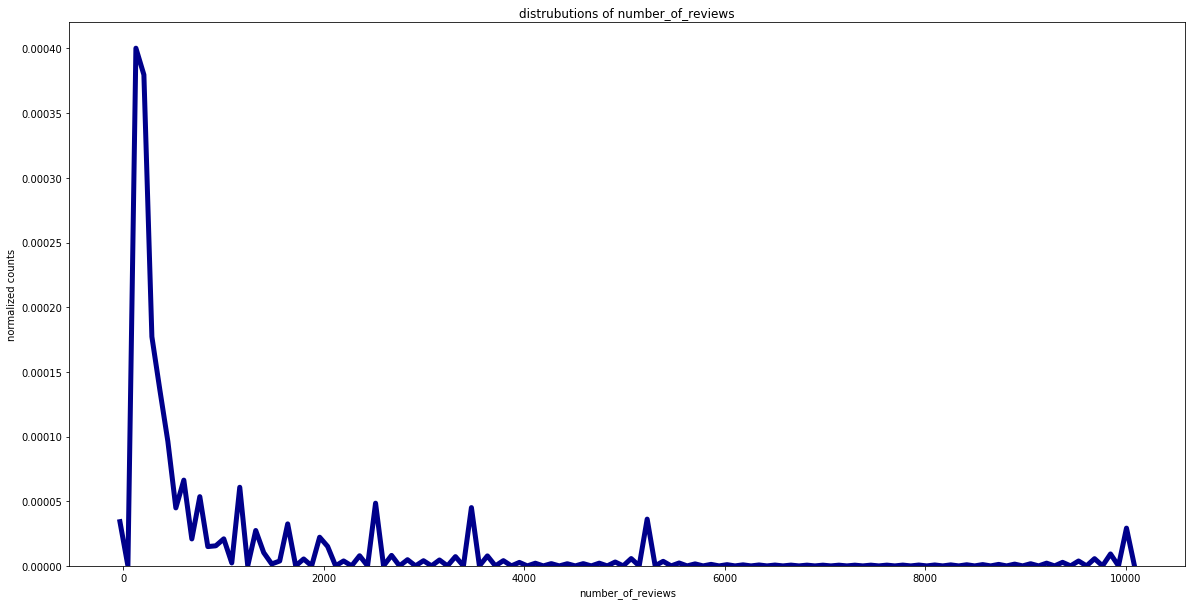

In [57]:
a = df['number_of_reviews'].value_counts()
sns.distplot(list(a),
             hist=False,
             color = 'darkblue',
             kde_kws={'linewidth': 5})
plt.title('distrubutions of number_of_reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('normalized counts')

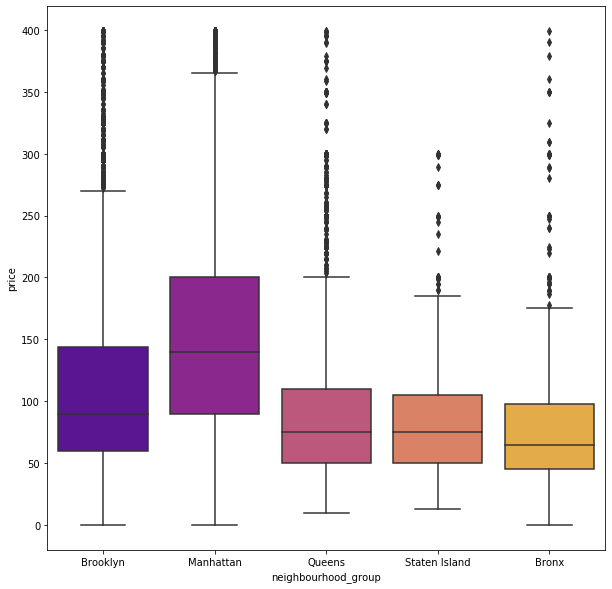

In [78]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df[df.price < 400], x='neighbourhood_group',y='price',palette='plasma')

#### Corrélations 

Analysez et commentez les corrélations entre les différentes variables (quantitatives ? catégorielles ?).

,price,minimum_nights,number_of_reviews,reviews_per_month
price,1,0.0427993,-0.0479542,-0.0505641
minimum_nights,0.0427993,1,-0.0801161,-0.124905
number_of_reviews,-0.0479542,-0.0801161,1,0.589407
reviews_per_month,-0.0505641,-0.124905,0.589407,1


#### Géographie

Proposez une analyse intéressante et visuelle grâce à la carte de NYC.

### Analyses complémentaires 

On peut faire une analyse des mots, prendre le Top N mots et regarder le nombre de clic (number of reviews ) en fonction du Top N mots pour essayer de constater que les mots influencent sur les anonces

## Prédiction du prix 

### Preprocessing

Vous pouvez préprocesser les données / créer des nouvelles variables pertinentes.

In [83]:
df = pd.get_dummies(data=df,columns=['neighbourhood_group','room_type'])


In [88]:
df.drop(['neighbourhood','name'],axis=1,inplace=True)

In [89]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,0,1,0,0,0,0,1,0
1,225,1,45,0.38,0,0,1,0,0,1,0,0
2,150,3,0,0.00,0,0,1,0,0,0,1,0
3,89,1,270,4.64,0,1,0,0,0,1,0,0
4,80,10,9,0.10,0,0,1,0,0,1,0,0


### Modèles

Vous devrez tester différents models (en appliquant un split Train Test à 70%) pour comparer leurs précisions (Root Mean Square Error - RMSE) et les discriminer (Bayesian Information Criteria - BIC).

Il vous est demandé de traiter a minima un modèle linéaire, et un modèle à base d'arbres. Cherchez également à analyser l'importance des différentes variables dans vos modèles.

#### Modèle selectionné et résultats

Expliquez ici pourquoi vous choisissez un certain modèle et ses résultats.